Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### TRABALHO 01 - Resposta de um sistema de 1 grau de liberdade a uma excitação

Aluno: Miguel Medina Jr.

Cartão: 312131

Prof.: Marcelo Rocha



In [3]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

Neste trabalho estudou-se as vibrações induzidas em uma estrutura de concreto armado em balanço após a excitação através de uma força aplicada pelo autor ao pular na extremidade livre da estrutura.
Para atingir o objetivo neste trabalho utilizou-se a técnica de Duhamel e resoveu-se a equação a seguir:

$$ \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) +
   \frac{2 \zeta \omega_{\rm n}}{2 \Delta t} \left( u_{i+1} - u_{i-1} \right) + 
   \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$
   

## 2. A Estrutura

A estrutura possui espessura de 15 centímetos, largura de 7 metros e comprimento de 3 metros, sendo engastada na viga pelo lado da largura, ou seja, possui 3 metros de balanço.


## 3. Metodologia

Para desenvolver as equações foi utilizado um aplicativo de celular (INVH BOSCH) que mede a resposta da estrutura frente ao impulso aplicado na estrutura. Este aplicativo trata de medir as variações nas três direções (x, y e z) através dos  acelerômetros instalados no celular.




## 4. Definição dos Valores Iniciais




In [6]:
m  = 5.0                                 # massa do sistema em kg
zt = 0.01                                # damping as ratio of critical
Tn = np.linspace(0.1,15,150)             # vetor do período (criado para variação da frequência)
fn = 1/Tn                                # frequência natural em Hz
u0 = 0.                                  # desocamento inicial
v0 = 0.                                  # velocidade inciail


## 5. Importação dos dados medidos



Importando os dados medidos pelo celular, desprezando as direções x e y a fim de avaliar apenas os deslocamentos verticais e simplificar o problema para um (1) grau de liberdade, obtém-se o gráfico a seguir.


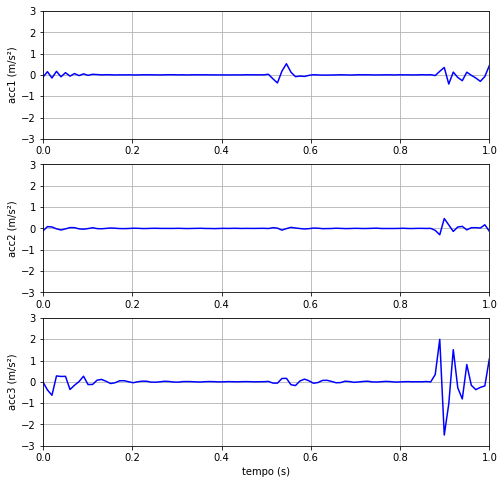

In [15]:
data = MRPy.from_file('data/Trabalho 01 - Miguel', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc, 'b')

    plt.xlim(0, data.Td);   
    plt.ylim(-3, 3);
    plt.ylabel('acc{0} (m/s²)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('tempo (s)');

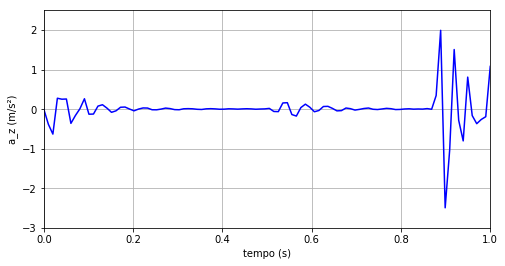

In [20]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0],'b')

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-3, 2.5);   plt.ylabel('a_z (m/s²)') 

plt.grid(True) 

## 5. Aplicação do método de Duhamel


Para obter os deslocamentos máximos para cada umas dos períodos utilizou-se o método de Duhamel.

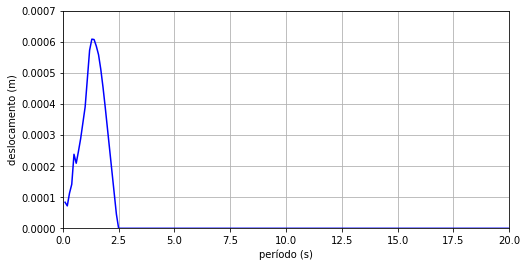

In [31]:
umax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0, v0)/m
    umax[k] = u.max()
    
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, umax, 'b')

plt.xlim(0, Tn[-1]);        plt.xlabel('período (s)') 
plt.ylim(0.0, 0.0007);  plt.ylabel('deslocamento (m)') 

plt.grid(True) 

## 6. Pseudoaceleração


Através do gráfico anterior, calculou-se o espectro dos máximos deslocamentos multiplicados por  2𝜋𝑓𝑛 , denominado pseudoaceleração.

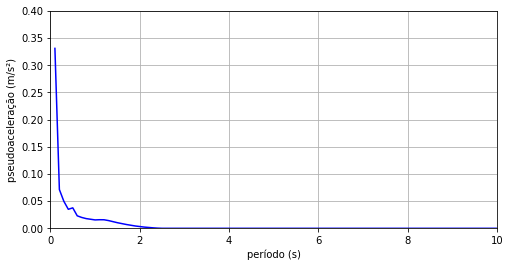

In [34]:
psa = ((2*np.pi*fn)**2)*umax
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, psa, 'b')

plt.xlim(0, 10);        plt.xlabel('período (s)') 
plt.ylim(0, 0.4);  plt.ylabel('pseudoaceleração (m/s²)') 

plt.grid(True) 

## 6. Periodograma


Periodograma é uma estimativa do espectro de densidade de um sinal. Ao plotar o periodograma, temos:

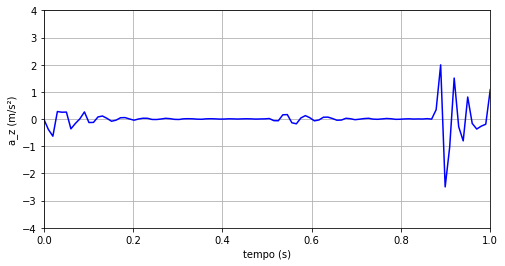

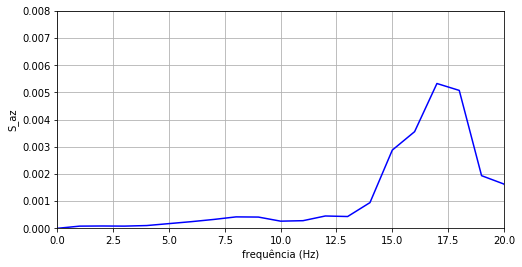

In [49]:
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(t, az[0],'b')

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-4, 4);   plt.ylabel('a_z (m/s²)') 

plt.grid(True) 

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0],'b')

plt.xlim(0, 20);   plt.xlabel('frequência (Hz)') 
plt.ylim(0,  0.008);   plt.ylabel('S_az') 

plt.grid(True) 

Analizando o periodograma, é possível observar uma frequência dominante com o valor de aproximadamente  17 𝐻𝑧 .

Calculando a resposta em termos do deslocamento através da Integral de Duhamel, para a frequência de 17 𝐻𝑧  e o periodograma para a mesma frequência, pode-se obter as seguintes figuras:

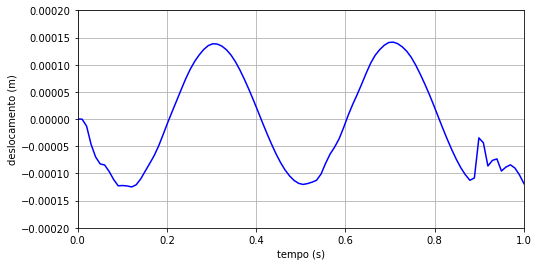

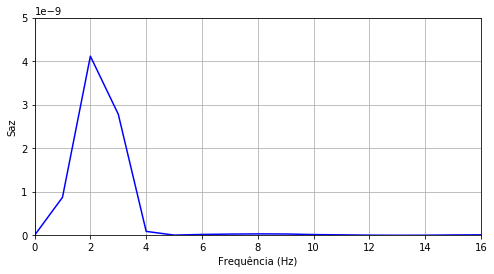

In [50]:
# Parâmetros de entrada na Integral de Duhamel

fnu = 17 # Frequência natural do sistema em Hz
u0 = 0. # Deslocamento inicial
v0 = 0. # Velocidade inicial
zt = 0.01                                # damping as ratio of critical

# Cálculo da resposta "u" para 2Hz pela Integral de Duhamel
u_D = az.sdof_Duhamel(fnu, zt, u0, v0)/m

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('tempo (s)') 
plt.ylim(-0.00020, 0.00020);  plt.ylabel('deslocamento (m)') 

plt.grid(True) 

Saz, fs = u_DH.periodogram()
f = u_D.f_axis()
plt.figure(10, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0],'b' )
plt.xlim(0, 16); plt.xlabel('Frequência (Hz)')
plt.ylim(0, 0.000000005); plt.ylabel('Saz')
plt.grid(True)
